## 2022-01-10
### goal: create a graph showing a the game-winning probability of each team by time
### similar to what <> on Twitter did

1. get individual game data
2. get probability win per move
3. plot by move


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import requests
from bs4 import BeautifulSoup as soup

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]


import seaborn as sns
sns.set()

In [2]:
# all paths and important links here
root = r'C:\Users\Chill\nfl'
YEAR = 2020
file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{YEAR}.csv.gz'
file_path

'C:\\Users\\Chill\\nfl\\play_by_play_2020.csv.gz'

In [3]:
# ALL STABLE FUNCTIONS HERE

#download from 2015 to 2020 and save data to folder
def download_and_store_data(year):    
    data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                             'play_by_play_' + str(year) + '.csv.gz?raw=True',
                             compression='gzip', low_memory=False)
    #save to disk
    path = r'C:\Users\Chill\nfl'
    file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'

    data.to_csv(file_path, compression='gzip', index=False)

#load data from disk
def load_data(year):
    filepath = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'
    data = pd.read_csv(filepath, compression='gzip', low_memory=False)                
    return data

def load_multi_years(all_data=True):
    if all_data:
        #list all downloaded data
        data = [file for file in os.listdir(root) if 'play_by_play' in file]
    
        #for each year, read into a df
        df = pd.DataFrame()
        dfs = []
        for file in data:
            df_year = pd.read_csv(file, compression='gzip', low_memory=False)
            dfs.append(df_year)
#         dfs = [pd.read_csv(file, compression='gzip') for file in data]
        df = pd.concat(dfs)
        return df
        #concat all dfs in list using concat

In [4]:
## NEW FUNCTIONS HERE

In [5]:
#ROUTINE CALLS HERE

#download data for the most recent week
download_and_store_data(2021)
#load downloaded data
data = load_data(2021)

In [137]:
#load all data
data = load_multi_years()

In [138]:
data

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,35,1999_01_ARI_PHI,1999091200,PHI,ARI,REG,1,PHI,home,ARI,...,0,1,0.126818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60,1999_01_ARI_PHI,1999091200,PHI,ARI,REG,1,PHI,home,ARI,...,0,1,-0.561568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82,1999_01_ARI_PHI,1999091200,PHI,ARI,REG,1,PHI,home,ARI,...,0,1,-0.641717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,1999_01_ARI_PHI,1999091200,PHI,ARI,REG,1,PHI,home,ARI,...,0,1,-0.723302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,126,1999_01_ARI_PHI,1999091200,PHI,ARI,REG,1,PHI,home,ARI,...,0,1,0.212661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49792,3546,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49793,3563,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.444560,NaN,NaN,NaN,NaN,NaN,0.599282,-59.928155
49794,3584,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49795,3601,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.711415,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2022-01-24, Mon


In [88]:
# find last game
data.game_id.unique()[-1] # 2021_20_SF_GB
#pick a game
game = '2021_20_SF_GB'
g0 = data[data.game_id==game].copy()

In [72]:
g0
g0.loc[g0.posteam_type=='away', 'defteam_score']

49654     7.0
49655     7.0
49656     7.0
49657     7.0
49658     7.0
         ... 
49787    10.0
49790    10.0
49791    10.0
49793    10.0
49795    10.0
Name: defteam_score, Length: 66, dtype: float64

In [108]:
g0.posteam_score.value_counts() # no nan
# where is posteam_score nan?
g0[g0.posteam_score.isnull()].play_type
# s1 = g0[~g0.posteam_score.isnull()].play_type.isnull()
# s1[s1==True] #49678, 49751
# g0.loc[[49678, 49751]].posteam_score # home_opening_kickoff
g0[g0.home_opening_kickoff==1]

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
49641,1,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49642,40,2021_20_SF_GB,2022012202,GB,SF,POST,20,GB,home,SF,...,0,1,0.372962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49643,62,2021_20_SF_GB,2022012202,GB,SF,POST,20,GB,home,SF,...,0,1,-0.169151,NaN,NaN,NaN,NaN,NaN,0.510234,-51.023376
49644,83,2021_20_SF_GB,2022012202,GB,SF,POST,20,GB,home,SF,...,0,1,1.350377,0.190661,3.183074,1.0,1.0,0.998842,0.602747,39.725286
49645,107,2021_20_SF_GB,2022012202,GB,SF,POST,20,GB,home,SF,...,0,1,-0.743720,NaN,NaN,NaN,NaN,NaN,0.459045,-45.904526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49792,3546,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49793,3563,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.444560,NaN,NaN,NaN,NaN,NaN,0.599282,-59.928155
49794,3584,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49795,3601,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.711415,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
#for each game
result = {}
games = data.game_id.unique()
# find total scores
for game in games:
#     game = '2021_01_BAL_LV'
    try:
        game_data = data[data.game_id==game].copy()
        game_data = game_data[game_data['play_type'].notnull() & ~game_data['play_type'].isin(['no_play'])]
        #find total scores
        final_score = game_data.total.unique()[0]
        #filter last two min
        g0 = game_data[game_data.qtr==4].copy()
        g0 = g0[g0.time <'02:00']
        first_play_after_2min = g0.iloc[0]
        score_at_2_minute = first_play_after_2min.posteam_score +  first_play_after_2min.defteam_score
        total_points_scored_2min = final_score - score_at_2_minute
        result[game] = total_points_scored_2min
    except:
        print(game, 'error')
#     print(game, result[game])
#     break
#filter the last 2 minues in the 4th QUARTER
#add up post and def team's scores at the start of the play
#output result as game_id:point_diff

1999_01_ARI_PHI error
1999_01_BUF_IND error
1999_01_CAR_NO error
1999_01_CIN_TEN error
1999_01_DAL_WAS error
1999_01_DET_SEA error
1999_01_KC_CHI error
1999_01_MIA_DEN error
1999_01_MIN_ATL error
1999_01_NE_NYJ error
1999_01_NYG_TB error
1999_01_OAK_GB error
1999_01_PIT_CLE error
1999_01_SF_JAX error
1999_02_ARI_MIA error
1999_02_ATL_DAL error
1999_02_CLE_TEN error
1999_02_DEN_KC error
1999_02_GB_DET error
1999_02_IND_NE error
1999_02_JAX_CAR error
1999_02_NO_SF error
1999_02_NYJ_BUF error
1999_02_OAK_MIN error
1999_02_PIT_BAL error
1999_02_SD_CIN error
1999_02_SEA_CHI error
1999_02_TB_PHI error
1999_02_WAS_NYG error
1999_03_ATL_STL error
1999_03_CHI_OAK error
1999_03_CIN_CAR error
1999_03_CLE_BAL error
1999_03_DEN_TB error
1999_03_DET_KC error
1999_03_IND_SD error
1999_03_MIN_GB error
1999_03_NYG_NE error
1999_03_PHI_BUF error
1999_03_SEA_PIT error
1999_03_SF_ARI error
1999_03_TEN_JAX error
1999_03_WAS_NYJ error
1999_04_ARI_DAL error
1999_04_BAL_ATL error
1999_04_BUF_MIA error
1999_04

2000_10_CAR_STL error
2000_10_DAL_PHI error
2000_10_DEN_NYJ error
2000_10_IND_CHI error
2000_10_KC_OAK error
2000_10_MIA_DET error
2000_10_MIN_GB error
2000_10_NYG_CLE error
2000_10_PIT_TEN error
2000_10_SD_SEA error
2000_10_SF_NO error
2000_10_TB_ATL error
2000_10_WAS_ARI error
2000_11_ARI_MIN error
2000_11_ATL_DET error
2000_11_BAL_TEN error
2000_11_CHI_BUF error
2000_11_CIN_DAL error
2000_11_GB_TB error
2000_11_KC_SF error
2000_11_MIA_SD error
2000_11_NE_CLE error
2000_11_NO_CAR error
2000_11_NYJ_IND error
2000_11_OAK_DEN error
2000_11_PHI_PIT error
2000_11_SEA_JAX error
2000_11_STL_NYG error
2000_12_ARI_PHI error
2000_12_ATL_SF error
2000_12_BUF_KC error
2000_12_CAR_MIN error
2000_12_CIN_NE error
2000_12_CLE_TEN error
2000_12_DAL_BAL error
2000_12_DET_NYG error
2000_12_IND_GB error
2000_12_JAX_PIT error
2000_12_NYJ_MIA error
2000_12_OAK_NO error
2000_12_SD_DEN error
2000_12_TB_CHI error
2000_12_WAS_STL error
2000_13_ATL_OAK error
2000_13_BUF_TB error
2000_13_CHI_NYJ error
2000_13_C

In [141]:
sorted(result.items(), key=lambda item: item[1], reverse=True)

[('2013_14_MIN_BAL', 28.0),
 ('2012_03_DET_TEN', 24.0),
 ('2001_12_ARI_OAK', 21.0),
 ('2001_08_CLE_CHI', 20.0),
 ('2012_11_JAX_HOU', 19.0),
 ('2019_16_CIN_MIA', 19.0),
 ('2020_06_HOU_TEN', 19.0),
 ('2004_14_KC_TEN', 17.0),
 ('2007_07_TEN_HOU', 17.0),
 ('2014_03_DEN_SEA', 17.0),
 ('2014_20_GB_SEA', 17.0),
 ('2015_13_DAL_WAS', 17.0),
 ('2016_12_KC_DEN', 17.0),
 ('2018_04_HOU_IND', 17.0),
 ('2018_16_GB_NYJ', 17.0),
 ('2021_03_MIA_LV', 17.0),
 ('2021_08_TEN_IND', 17.0),
 ('2002_02_BUF_MIN', 16.0),
 ('2005_12_STL_HOU', 16.0),
 ('2007_12_SF_ARI', 16.0),
 ('2012_13_SEA_CHI', 16.0),
 ('2015_05_WAS_ATL', 16.0),
 ('2015_12_NE_DEN', 16.0),
 ('2016_09_DET_MIN', 16.0),
 ('2018_13_CHI_NYG', 16.0),
 ('2018_20_NE_KC', 16.0),
 ('2020_15_SF_DAL', 16.0),
 ('2021_01_SF_DET', 16.0),
 ('2021_14_SF_CIN', 16.0),
 ('2021_18_LAC_LV', 16.0),
 ('2004_17_DAL_NYG', 15.0),
 ('2005_09_OAK_KC', 15.0),
 ('2005_11_ARI_STL', 15.0),
 ('2006_04_NO_CAR', 15.0),
 ('2007_07_NYJ_CIN', 15.0),
 ('2011_19_NO_SF', 15.0),
 ('2018_0

In [30]:
g0['home_team_pre'] = g0[g0.posteam_score].copy()
# home_team_pre = g0.loc[g0.posteam_type=='home', 'posteam_score']
# home_team_pre.size # 74
g0['home_team_pre'] = g0.loc[g0.posteam_type=='away', 'defteam_score']
# home_team_pre.size # 66
g0['home_team_pre']


KeyError: "None of [Float64Index([ nan,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,\n              ...\n              10.0,  nan,  nan, 10.0, 10.0,  nan, 10.0,  nan, 10.0,  nan],\n             dtype='float64', length=156)] are in the [columns]"

In [80]:
g0[g0.time <'02:00']['total_home_score']
g0.loc[49785].time

'01:16'

In [81]:
g0 = g0[(g0.game_half=='Half2') & (g0.qtr==4)]
# g0 = g0[g0.time <'02:00']
# g0.time

In [87]:
g0 = g0[g0.qtr==4]
g0 = g0[g0.time <'02:00'] #time at start of play lol
# g0 = g0[g0.time > '13:00']
#posteam_score, defteam_score, home_score, away_score
#find final score for home team, away team
#find scores for home team and away team at start of 2 min warning
# g0[['play_id', 'game_id', 'home_team', 'away_team', 'posteam']]
final_home_team_score = {'home':[g0.home_team.iloc[0], g0.home_score.iloc[0]]}
final_away_team_score = {'away':[g0.away_team.iloc[0], g0.away_score.iloc[0]]}
print(final_home_team_score, final_away_team_score)

#check the first play after 2min. If postteamtype == home, let home_team_score_pre = posteam_score, if not, away_team
first_play_after_2min = g0.iloc[0]
if (first_play_after_2min.posteam_type=='home'):
    home_team_score_pre = first_play_after_2min.posteam_score
    away_team_score_pre = first_play_after_2min.defteam_score
else:
    away_team_score_pre = first_play_after_2min.posteam_score
    home_team_score_pre = first_play_after_2min.defteam_score
print('home,', home_team_score_pre, 'away, ',away_team_score_pre)

points_diff_home = final_home_team_score['home'][1] - home_team_score_pre
points_diff_away = final_away_team_score['away'][1] - away_team_score_pre
points_diff_home, points_diff_away

total_points_scored_2min = final_home_team_score['home'][1] + final_away_team_score['away'][1] - (first_play_after_2min.posteam_score +  first_play_after_2min.defteam_score)
total_points_scored_2min

{'home': ['GB', 10]} {'away': ['SF', 13]}
home, 10.0 away,  10.0


3.0

In [54]:
'13:00' > '0200'

True

In [70]:
first_play_after_2min.total_home_score, first_play_after_2min.total_away_score
first_play_after_2min.game_half

'Half2'



-----

1. get individual game data
2. get probability win per move
3. plot by move

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
48759,1,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48760,39,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.335709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48761,70,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.887342,0.391760,4.500686,3.0,0.989105,0.395251,0.478114,52.188614
48762,94,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.012900,NaN,NaN,NaN,NaN,NaN,0.257777,-25.777668
48763,115,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,1,1,-0.489979,1.203993,10.375364,9.0,0.529288,0.246045,0.479117,52.088282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48913,3758,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,-0.757589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48914,3780,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48915,3808,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48916,3830,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#load a random complete game

#sample from a column
# random????
game_data = data[data.game_id == data.game_id[0]].copy()
# col wpa, also wp



In [58]:
game_data.play_id
game_data.wpa
game_data.iloc[-1]
#wp, def_wp
game_data[['home_team', 'away_team', 'posteam', 'defteam', 'wp', 'home_wp', 'away_wp', 'def_wp', 'home_wp_post', 'away_wp_post']]

,home_team,away_team,posteam,defteam,wp,def_wp,home_wp_post,away_wp_post
0,TEN,ARI,NaN,NaN,0.546262,0.453738,NaN,NaN
1,TEN,ARI,TEN,ARI,0.546262,0.453738,0.546262,0.453738
2,TEN,ARI,TEN,ARI,0.546262,0.453738,0.520599,0.479401
3,TEN,ARI,TEN,ARI,0.520599,0.479401,0.498319,0.501681
4,TEN,ARI,TEN,ARI,0.498319,0.501681,0.461707,0.538293
...,...,...,...,...,...,...,...,...
177,TEN,ARI,NaN,NaN,0.000388,0.999612,NaN,NaN
178,TEN,ARI,TEN,ARI,0.000388,0.999612,0.000338,0.999662
179,TEN,ARI,TEN,ARI,0.000338,0.999662,0.000466,0.999534
180,TEN,ARI,TEN,ARI,0.000466,0.999534,0.000000,1.000000


In [35]:
#### TODAY 2022-18-1
#get a copy of a game's data
ne_buf = data.game_id.unique()[-4]
g1 = data[data.game_id == ne_buf].copy()
g1
cols = ['home_team', 'away_team', 'posteam', 'defteam', 'wp', 'def_wp', 'home_wp_post', 'away_wp_post']
# filter only needed cols
g1a = g1[cols].copy()
#plot probability
g1a

,home_team,away_team,posteam,defteam,wp,def_wp,home_wp_post,away_wp_post
48759,BUF,NE,NaN,NaN,0.546262,0.453738,NaN,NaN
48760,BUF,NE,BUF,NE,0.546262,0.453738,0.552488,0.447512
48761,BUF,NE,BUF,NE,0.552488,0.447512,0.587171,0.412829
48762,BUF,NE,BUF,NE,0.587171,0.412829,0.579976,0.420024
48763,BUF,NE,BUF,NE,0.579976,0.420024,0.562013,0.437987
...,...,...,...,...,...,...,...,...
48913,BUF,NE,BUF,NE,0.999960,0.000040,0.999960,0.000040
48914,BUF,NE,BUF,NE,0.999960,0.000040,NaN,NaN
48915,BUF,NE,BUF,NE,0.999953,0.000047,NaN,NaN
48916,BUF,NE,BUF,NE,0.999939,0.000061,NaN,NaN


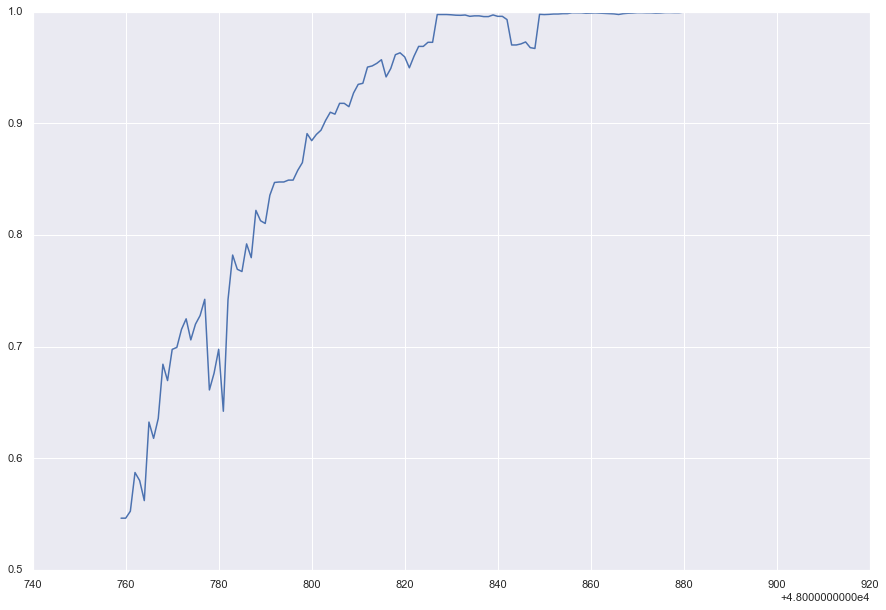

In [45]:
# g1[g1.home_wp.isnull()]
plt.plot(g1.home_wp)

In [57]:
g1[g1.play_type.isnull()]

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
48759,1,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48795,941,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NE,away,BUF,...,0,1,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48825,1694,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NaN,NaN,NaN,...,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48843,2087,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48878,2926,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48908,3656,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NaN,NaN,NaN,...,0,1,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48917,3851,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
g1['play_type'].dropna()
g1[g1['wpa'].isnull()]['play_type']
# g1

48793     kickoff
48914    qb_kneel
48915    qb_kneel
48916    qb_kneel
48917         NaN
Name: play_type, dtype: object

In [41]:
# show all rows where home_wp_post is NaN 
df = g1[~g1['play_type'].isnull()].copy() # drop end of play rows
# df.play_type #missing = end of play -> drop these rows
df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
48760,39,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.335709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48761,70,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.887342,0.391760,4.500686,3.0,0.989105,0.395251,0.478114,52.188614
48762,94,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.012900,NaN,NaN,NaN,NaN,NaN,0.257777,-25.777668
48763,115,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,1,1,-0.489979,1.203993,10.375364,9.0,0.529288,0.246045,0.479117,52.088282
48764,144,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,1,1,1.990277,NaN,NaN,NaN,NaN,NaN,0.556979,44.302064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48912,3742,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NE,away,BUF,...,0,1,0.067573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48913,3758,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,-0.757589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48914,3780,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48915,3808,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
?g1.dropna

In [68]:

# g1[g1['play_type'].dropna()]

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
48760,39,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.335709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48761,70,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.887342,0.391760,4.500686,3.0,0.989105,0.395251,0.478114,52.188614
48762,94,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.012900,NaN,NaN,NaN,NaN,NaN,0.257777,-25.777668
48763,115,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,1,1,-0.489979,1.203993,10.375364,9.0,0.529288,0.246045,0.479117,52.088282
48764,144,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,1,1,1.990277,NaN,NaN,NaN,NaN,NaN,0.556979,44.302064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48912,3742,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NE,away,BUF,...,0,1,0.067573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48913,3758,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,-0.757589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48914,3780,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48915,3808,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
null_wpa = df[df.wpa.isnull()]
null_wpa.play_type # kickoff, qb_kneel

48793     kickoff
48914    qb_kneel
48915    qb_kneel
48916    qb_kneel
Name: play_type, dtype: object

In [13]:
# g1a = df[cols].copy()
# g1a.wp.plot();
df[abs(df.home_wp) > 0.95]

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
48812,1354,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NE,away,BUF,...,0,1,-0.309866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48813,1380,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NE,away,BUF,...,0,1,-0.143239,1.019165,8.644940,7.0,0.558238,0.220771,0.627704,37.229586
48814,1404,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NE,away,BUF,...,0,1,-0.614572,0.422281,6.610551,3.0,1.000000,1.000000,0.719066,28.093368
48815,1426,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NE,away,BUF,...,0,1,2.416319,NaN,NaN,NaN,NaN,NaN,0.981559,1.844072
48818,1501,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NE,away,BUF,...,0,1,-0.197312,NaN,NaN,NaN,NaN,NaN,0.979159,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48912,3742,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,NE,away,BUF,...,0,1,0.067573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48913,3758,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,-0.757589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48914,3780,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48915,3808,2021_19_NE_BUF,2022011502,BUF,NE,POST,19,BUF,home,NE,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#create a sequential play_id
 # 159
g1['sorted_play_id'] = np.arange(g1.shape[0])
# g1[['sorted_play_id', 'home_wp']].isnull().sum() # 0 no missing data!
df_plot = g1[['sorted_play_id', 'home_wp']] # 0 no missing data!

In [71]:
g1['home_team'].iloc[0]

'BUF'

In [9]:
# find data of a specific game and return a copy
def get_data(game_id, main_df):
    return main_df[main_df['game_id'] ==game_id].copy()
    
# data processing: drop na values for relevant columns
#drop na vals in play_type

#plot game progress
def plot_game_wp(df, return_area=True):
    plt.ylim(-.52, 0.52) 
    y_range = np.round((np.arange(11)/10 - 0.5), 1)
    plt.yticks(y_range, y_range)
    plt.plot(range(df.shape[0]), df.home_wp-0.5)
    if return_area:
        return calc_area(df)
    
#calculate and return normalized absolute probability area under curve for each team
def calc_area(df, home_team, away_team):
    home_team_area = np.trapz(df.home_wp) / np.trapz(df.home_wp*0+1) # maximum curve of 1
    away_team_area = 1 - home_team_area
    return {home_team:home_team_area, away_team:away_team_area}

def process_game(game_id, main_df=data, plot=True):
    game_df = get_data(game_id, main_df)
#     game_df = game_df[game_df.play_type.notnull()]
    home_team = game_df['home_team'].iloc[0]
    away_team = game_df['away_team'].iloc[0]
    if plot:
        plot_game_wp(game_df, False)
#     areas = calc_area(game_df, home_team, away_team)
#     return areas
    return calc_area(game_df, home_team, away_team)

[{'TEN': 0.14556793224018252, 'ARI': 0.8544320677598175},
 {'LV': 0.3795081401598434, 'BAL': 0.6204918598401565},
 {'LA': 0.8548867526407868, 'CHI': 0.14511324735921316},
 {'KC': 0.3798503157505791, 'CLE': 0.620149684249421},
 {'TB': 0.6359866299040129, 'DAL': 0.3640133700959871},
 {'NYG': 0.3065312494099955, 'DEN': 0.6934687505900046},
 {'NO': 0.864051703376285, 'GB': 0.135948296623715},
 {'HOU': 0.8743885349088764, 'JAX': 0.12561146509112364},
 {'WAS': 0.424816885317533, 'LAC': 0.5751831146824671},
 {'NE': 0.41433037325538496, 'MIA': 0.5856696267446151},
 {'CIN': 0.6694582008780171, 'MIN': 0.3305417991219829},
 {'CAR': 0.8112043190676836, 'NYJ': 0.18879568093231636},
 {'ATL': 0.2806469489884833, 'PHI': 0.7193530510115167},
 {'BUF': 0.5324453050048443, 'PIT': 0.4675546949951557},
 {'IND': 0.2322160212113602, 'SEA': 0.7677839787886398},
 {'DET': 0.1598264412904225, 'SF': 0.8401735587095776},
 {'TB': 0.8178972241482312, 'ATL': 0.18210277585176882},
 {'MIA': 0.12364709371045779, 'BUF': 0

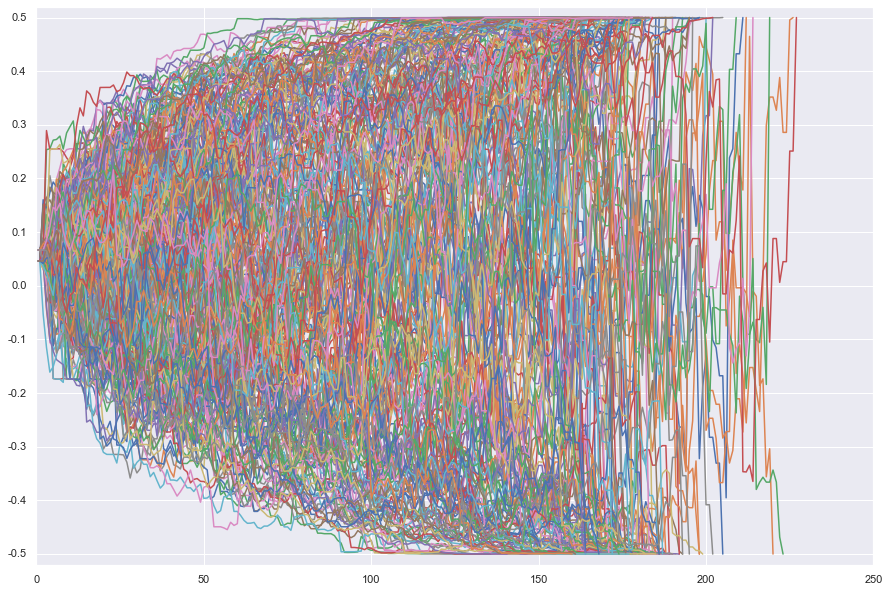

In [10]:
games = data.game_id.unique()
results = [process_game(i) for i in games]
results


In [31]:
[game for game in games if 'MIA' in game and 'NYJ' in game]

['2021_11_MIA_NYJ', '2021_15_NYJ_MIA']

[{'TEN': 0.14556793224018252, 'ARI': 0.8544320677598175},
 {'LV': 0.3795081401598434, 'BAL': 0.6204918598401565},
 {'LA': 0.8548867526407868, 'CHI': 0.14511324735921316},
 {'KC': 0.3798503157505791, 'CLE': 0.620149684249421},
 {'TB': 0.6359866299040129, 'DAL': 0.3640133700959871},
 {'NYG': 0.3065312494099955, 'DEN': 0.6934687505900046},
 {'NO': 0.864051703376285, 'GB': 0.135948296623715},
 {'HOU': 0.8743885349088764, 'JAX': 0.12561146509112364},
 {'WAS': 0.424816885317533, 'LAC': 0.5751831146824671},
 {'NE': 0.41433037325538496, 'MIA': 0.5856696267446151},
 {'CIN': 0.6694582008780171, 'MIN': 0.3305417991219829},
 {'CAR': 0.8112043190676836, 'NYJ': 0.18879568093231636},
 {'ATL': 0.2806469489884833, 'PHI': 0.7193530510115167},
 {'BUF': 0.5324453050048443, 'PIT': 0.4675546949951557},
 {'IND': 0.2322160212113602, 'SEA': 0.7677839787886398},
 {'DET': 0.1598264412904225, 'SF': 0.8401735587095776},
 {'TB': 0.8178972241482312, 'ATL': 0.18210277585176882},
 {'MIA': 0.12364709371045779, 'BUF': 0

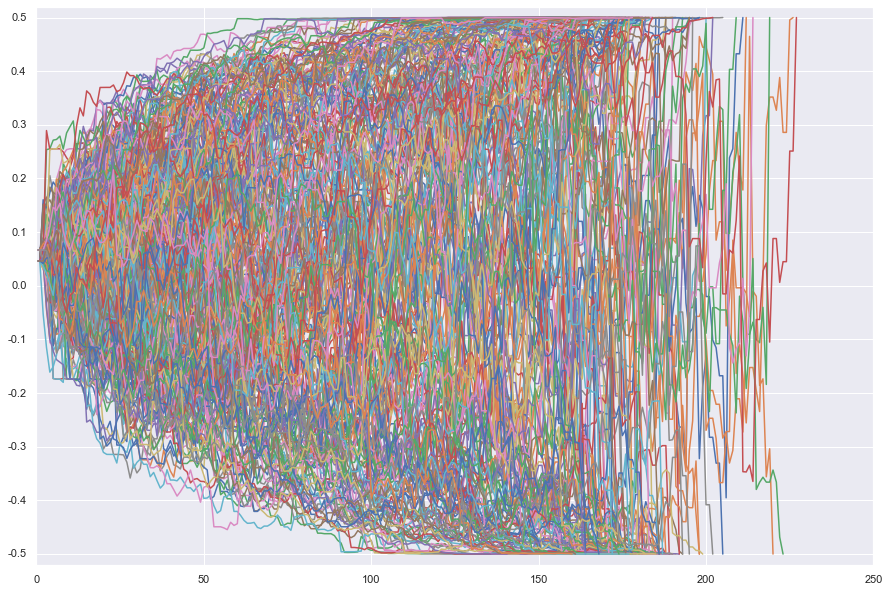

In [34]:
plt.figure()
[process_game(i, plot=True) for i in games]

In [26]:
#most balanced game
best = 1
best_game = 0
for game in results:
    a,b = game.values()
#     print(a,b)
    if abs((a-0.5)) < abs((best-0.5)):
        best_game = game
        best = a
        print(best_game)
best_game

{'TEN': 0.14556793224018252, 'ARI': 0.8544320677598175}
{'LV': 0.3795081401598434, 'BAL': 0.6204918598401565}
{'KC': 0.3798503157505791, 'CLE': 0.620149684249421}
{'WAS': 0.424816885317533, 'LAC': 0.5751831146824671}
{'BUF': 0.5324453050048443, 'PIT': 0.4675546949951557}
{'NE': 0.4944815638352391, 'TB': 0.5055184361647609}
{'MIA': 0.5033754074826626, 'NYJ': 0.49662459251733737}


{'MIA': 0.5033754074826626, 'NYJ': 0.49662459251733737}

In [ ]:
### game where one team begin with high probabiblity and ended up getting crushed

## DALLAS game: final play is no play but wp still changes -> don't drop null vals in play_type

,home_wp,play_type,wpa
49460,0.019066,no_play,-0.000000
49461,0.019066,run,0.000953
49462,0.018113,no_play,-0.000000
49463,0.018113,no_play,-0.000000
49464,0.018113,run,0.002438
49465,0.015675,no_play,-0.000000
49466,0.015675,no_play,-0.004194
49467,0.019869,punt,-0.054127
49468,0.073995,pass,0.023768
49469,0.097763,pass,-0.008370


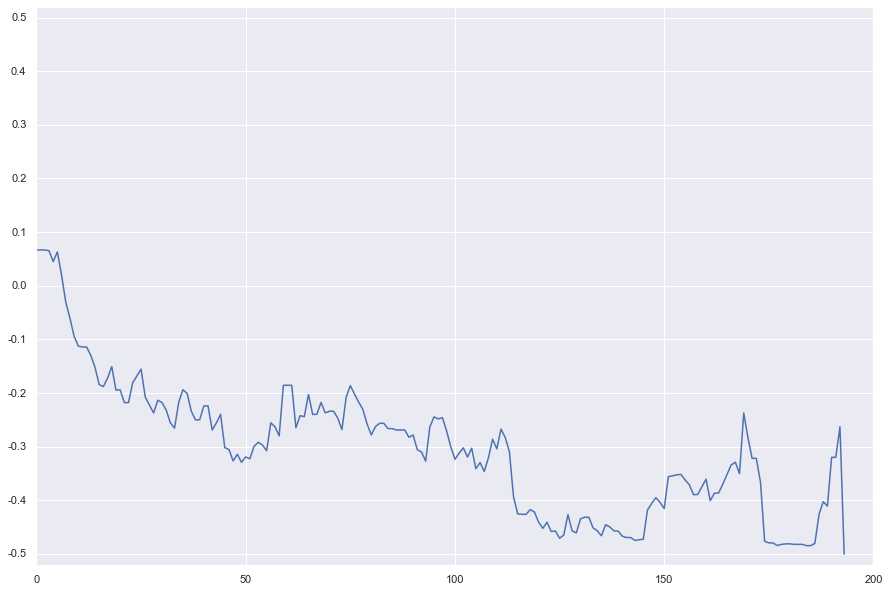

In [108]:
df = get_data('2021_19_SF_DAL', data)
df.home_wp[-10:]
plot_game_wp(df, False)
df[['home_wp', 'play_type', 'wpa']][-15:]


{'DAL': 0.19383554265758524, 'SF': 0.8061644573424147}

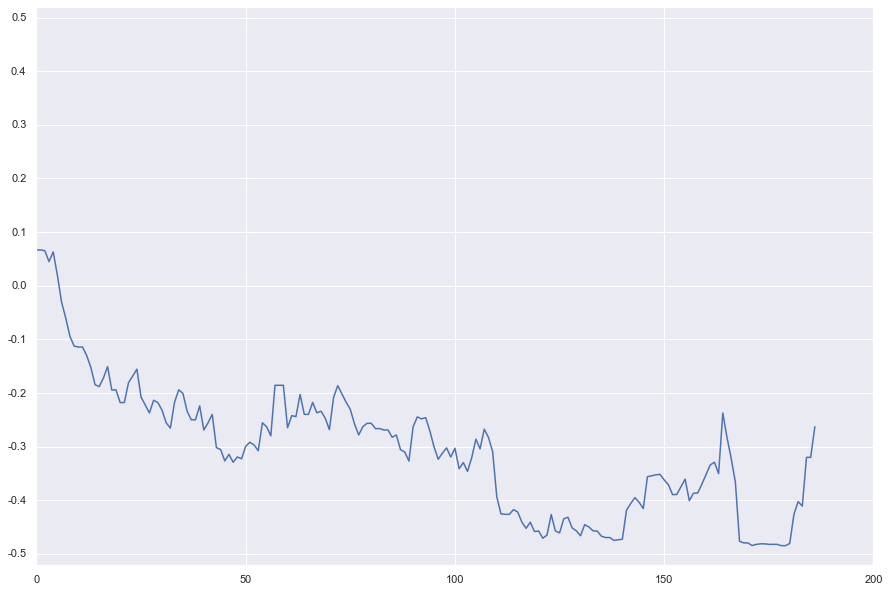

In [100]:
# process_game('2021_19_NE_BUF')
process_game('2021_19_SF_DAL')

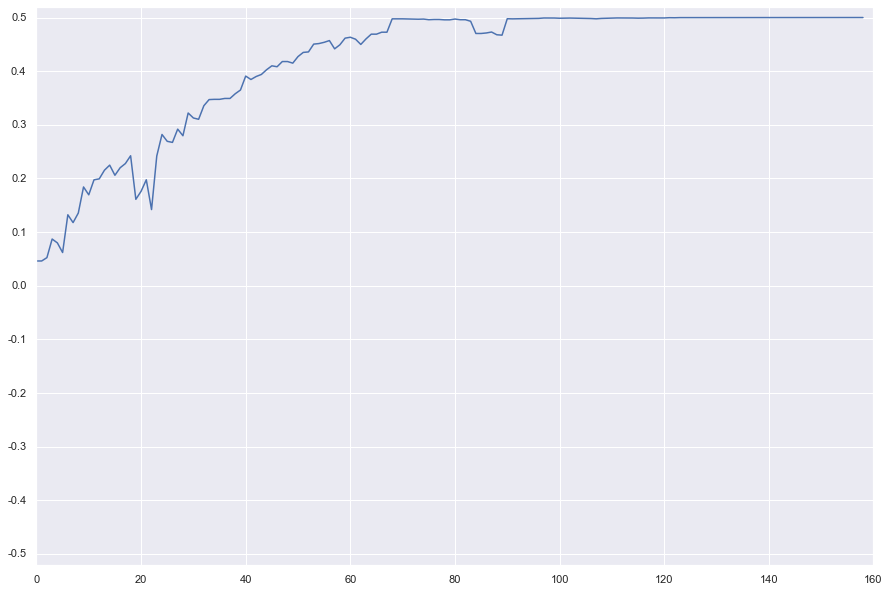

In [15]:
df_plot
# plt.ylim(-.5, 0.5)
plt.ylim(-.52, 0.52) 
y_range = np.round((np.arange(11)/10 - 0.5), 1)
plt.yticks(y_range, y_range)
plt.plot(df_plot.sorted_play_id, df_plot.home_wp-0.5)

#### integrate area under curves where curves go above and below x-axis
https://stackoverflow.com/questions/57502437/calculate-the-absolute-area-from-a-graph-that-also-gets-negative
- use `np.trapz` 
- -> use absolute of that func or yvals
f_abs = np.abs(f)
print(trapz(f_abs,x))
- if want to ignor negative paarts, use clip
trapz(f.clip(min=0),x))

### drop a row b.o one column
https://stackoverflow.com/questions/46091924/python-how-to-drop-a-row-whose-particular-column-is-empty-nan

- use `dropna` w/ `subset`
`data = data.dropna(subset=['sms'])`
`data.dropna(axis=0, subset=('sms', ))`
- boolean indexing
`data = data[data['sms'].notnull()]`
- use query
`data.query("sms == sms")`

In [ ]:
f_abs = np.abs(f)
print(trapz(f_abs,x))

In [34]:
np.trapz(df_plot.home_wp) / np.trapz(df_plot.home_wp*0+1)
np.trapz(df_plot.home_wp) / np.trapz(df_plot.home_wp*0+1)
 

0.9180696254032875

In [32]:
s = df_plot.home_wp *0 +1
s
np.trapz(s)

158.0

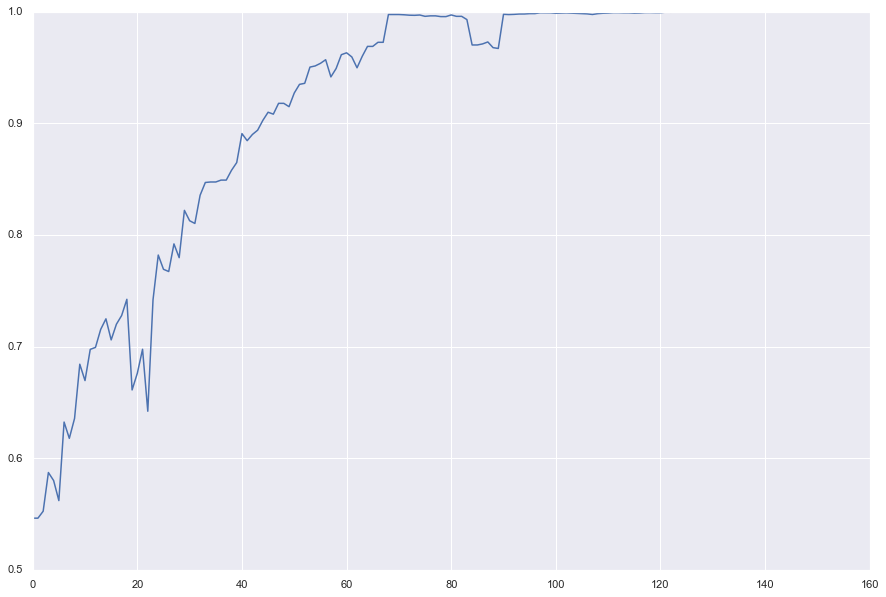

In [24]:
plt.plot(range(df_plot.shape[0]),df_plot.home_wp)
s= pd.Series(df_plot.home_wp)
s = s.reset_index(drop=True)


In [16]:
df_plot[abs(df_plot.home_wp) > 0.95] # from play 53

,sorted_play_id,home_wp
48812,53,0.950457
48813,54,0.951490
48814,55,0.953808
48815,56,0.957051
48818,59,0.961562
...,...,...
48913,154,0.999960
48914,155,0.999960
48915,156,0.999953
48916,157,0.999939


In [39]:
game_data
#can plot plot NaN ?
# sns.lineplot(y=game_data['home_wp_post'])
plt.lineplot(y=[1,2,3])


AttributeError: module 'matplotlib.pyplot' has no attribute 'lineplot'

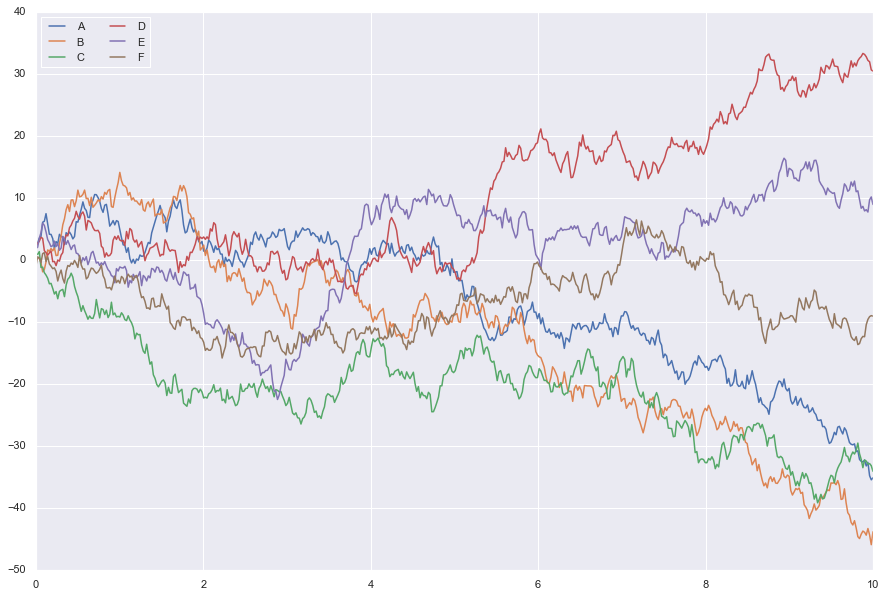

In [41]:


import seaborn as sns
sns.set()

# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

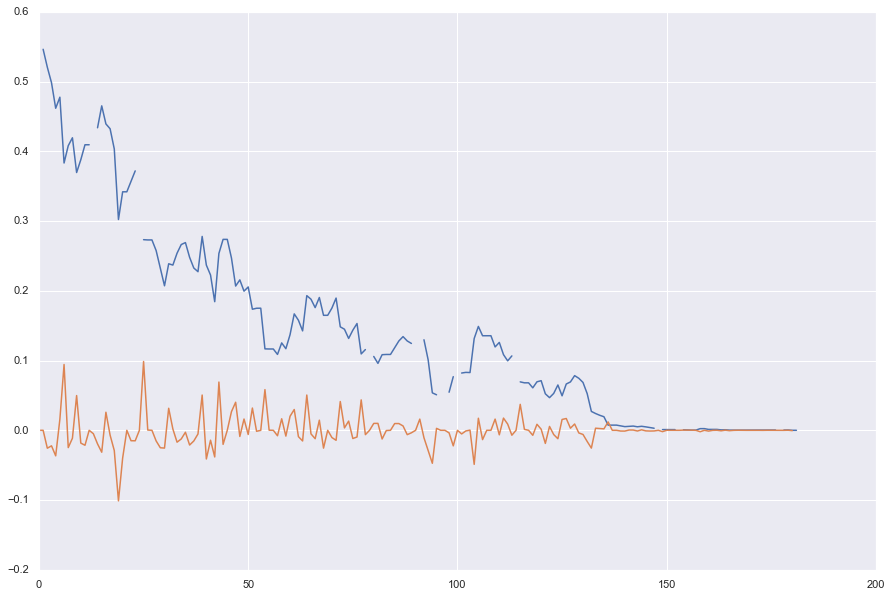

In [60]:
plt.plot(game_data['home_wp_post'])
plt.plot(game_data['wpa'])


In [71]:
game_data['away_team'].unique()[0]
game_data['posteam'] == game_data['away_team'].unique()[0]
game_data.loc[game_data['posteam'] == game_data['away_team'].unique()[0], 'combined_wpa']

6      0.094349
7     -0.024801
8     -0.011362
9      0.049807
10    -0.018352
         ...   
172   -0.000013
173   -0.000077
174    0.000042
175   -0.000000
176   -0.000088
Name: combined_wpa, Length: 88, dtype: float64

In [72]:
game_data[game_data['wpa'].isnull()]
# game_data['wpa'] == -game_data['wpa'].
# game_data['combined_wpa'] = game_data['wpa']
# game_data.loc[game_data['posteam'] == game_data['away_team'].unique()[0], 'combined_wpa'] *= -1



In [84]:
game_data.columns.get_loc('combined_wpa')

372

In [85]:
start = game_data.iloc[0].wp - .5
game_data.iloc[0, game_data.columns.get_loc('combined_wpa')] += start

In [87]:
start

0.04626178741455078

In [86]:
game_data['combined_wpa']

0      0.046262
1      0.000000
2     -0.025663
3     -0.022280
4     -0.036612
         ...   
177    0.000000
178   -0.000051
179    0.000128
180   -0.000466
181         NaN
Name: combined_wpa, Length: 182, dtype: float64

In [153]:
game_data['new_wp'] = game_data['wp']
#change wp of away team by multiplying by -1
# game_data.loc[game_data['posteam'] == game_data['away_team'].unique()[0], 'new_wp'] = 1 - game_data.loc[game_data['posteam'] == game_data['away_team'].unique()[0], 'new_wp']

# game_data.loc[game_data['posteam'] == game_data['home_team'].unique()[0], 'new_wp'] = 1 - game_data.loc[game_data['posteam'] == game_data['home_team'].unique()[0], 'new_wp']
game_data.loc[~(game_data['posteam'] == game_data['home_team'].unique()[0]), 'new_wp'] = 1 - game_data.loc[~(game_data['posteam'] == game_data['home_team'].unique()[0]), 'new_wp']


In [167]:
game_data['wp'][90] # at 90: .12 continous from 89 ->91
game_data['new_wp'][90] # .88, discont. from 89 -> 91
game_data[['posteam', 'defteam', 'wp', 'new_wp', 'play_type']].to_csv('check ari-ten.csv')

- why not just plot 'home_wp'? Looks good

0.0

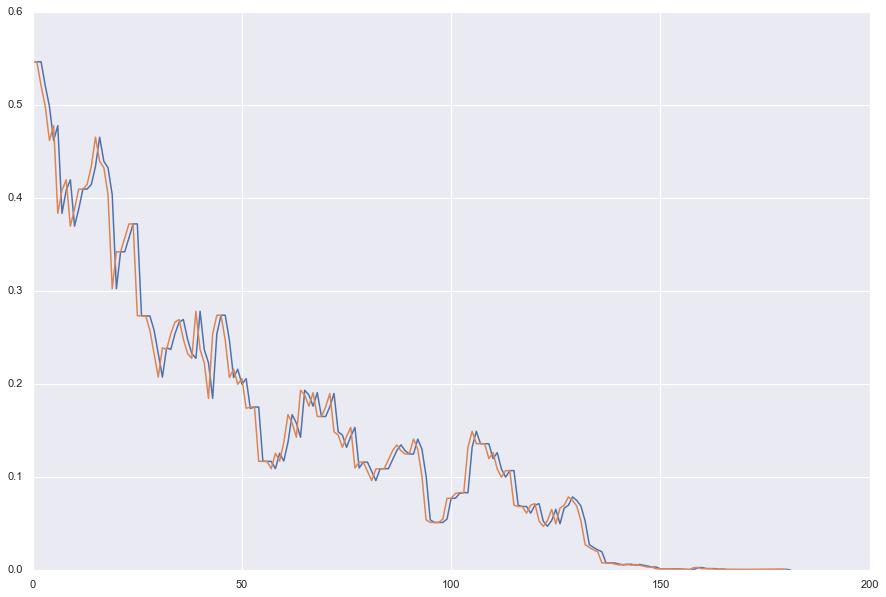

In [176]:
# game_data['wp'].isnull().sum() # 1
# plt.plot(game_data['new_wp'])
plt.plot(game_data['home_wp'])
plt.plot(game_data['combined_wpa'].cumsum()+.5)
# game_data.iloc[80:95]['new_wp']
# game_data.iloc[90]['play_type']
# game_data.iloc[90][''] #.12
# no_play at 90: wp is home team
# nan: wp is away team
game_data.iloc[90]['wpa']

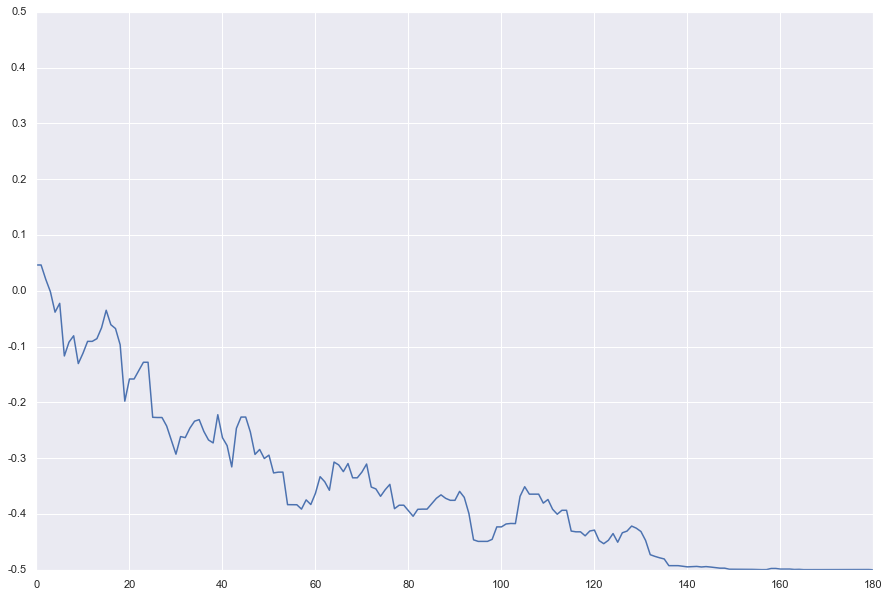

In [100]:
# plt.plot(game_data['combined_wpa'].cumsum())
plt.ylim(-.5, 0.5)
y_range = np.round((np.arange(11)/10 - 0.5), 1)
plt.yticks(y_range, y_range)
plt.plot((game_data['combined_wpa']).cumsum())


array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

In [57]:
game_data[game_data['home_wp_post'].isnull()]['play_type']
#drop na /missing in col play_type
# game_data['play_type'].dropna()
# game_data[game_data['home_wp_post']]
cp = game_data.copy()
cp[cp['home_wp_post']]

KeyError: "None of [Float64Index([               nan, 0.5462617874145508, 0.5205992460250854,\n              0.4983189702033996, 0.4617069661617279, 0.4775656461715698,\n              0.3832170963287353, 0.4080178737640381, 0.4193800091743469,\n              0.3695733547210693,\n              ...\n              0.0002657771110534, 0.0003427267074584, 0.0003004074096679,\n              0.0003004074096679, 0.0003884738252963,                nan,\n              0.0003375104279257, 0.0004656789242289,                0.0,\n                             0.0],\n             dtype='float64', length=182)] are in the [columns]"

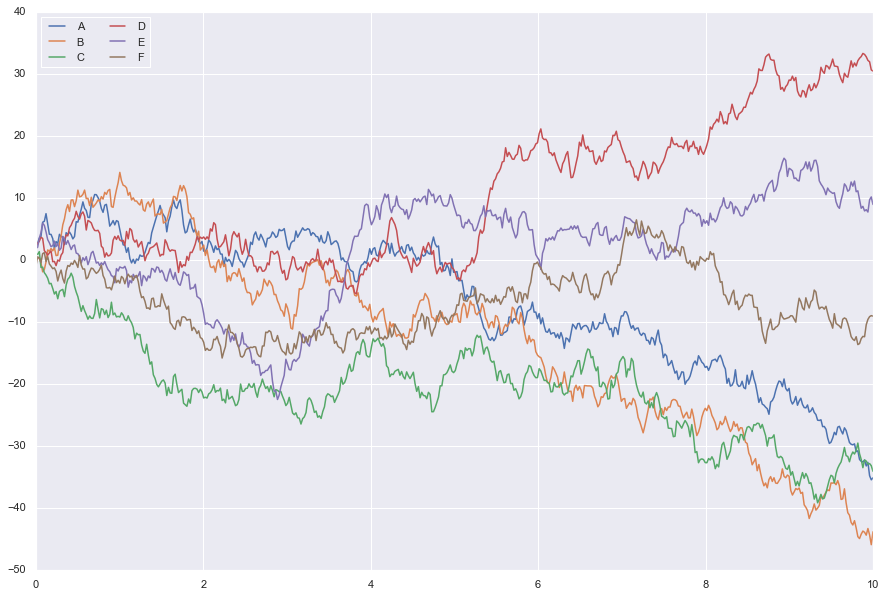

In [40]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)


# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');



In [48]:
df1 = data.groupby('game_id')['result'].last()
df2 = data.groupby('game_id')['wp'].first()
home_team_favored = df2[df2 >0.5]
#filter data for games where home team is favored
df3 = data[data.game_id.isin(home_team_favored.index)]
#find games where home team loses
df4 = df3.groupby('game_id')['result'].last()
df4 = df4[df4 <0]
df4

game_id
2021_01_ARI_TEN   -25
2021_01_DEN_NYG   -14
2021_01_MIA_NE     -1
2021_01_PHI_ATL   -26
2021_01_PIT_BUF    -7
                   ..
2021_17_TB_NYJ     -4
2021_18_DAL_PHI   -25
2021_18_KC_DEN     -4
2021_18_SF_LA      -3
2021_18_TEN_HOU    -3
Name: result, Length: 73, dtype: int64

In [51]:
df4.sort_values()

game_id
2021_08_PHI_DET   -38
2021_02_BUF_MIA   -35
2021_13_IND_HOU   -31
2021_10_BUF_NYJ   -28
2021_06_LA_NYG    -27
                   ..
2021_15_LV_CLE     -2
2021_15_GB_BAL     -1
2021_16_CHI_SEA    -1
2021_17_LA_BAL     -1
2021_01_MIA_NE     -1
Name: result, Length: 73, dtype: int64